# The Metropolis-Hastings algorithm

In [11]:
import numpy as np
import math
import matplotlib.pyplot as plt

 - Sampling from a Gaussian distribution using Metropolis-Hastings with uniform proposal

A one dimensional Gaussian distribution function is given by:

\begin{equation}
p(x) = \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x - \mu}{\sigma})^2} \rightarrow \mathcal{N}(\mu,\sigma)
\end{equation}

where $\sigma$ is the standard deviation of the distribution and $\mu$ is the mean. The following is the $\mathcal{N}(0, 1)$ distirbution. 

In [ ]:
def normal_distribution(x, mu, sigma):
    
    p = (1/(sigma*np.sqrt(2*math.pi)))*np.exp(-0.5*( (x - mu)/sigma )**2)
    
    return p
    

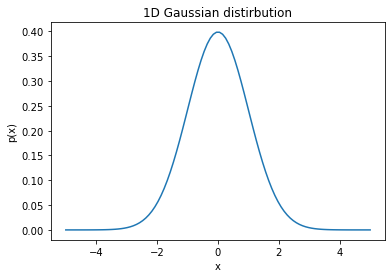

In [25]:
mu = 0
sigma = 1

x = np.linspace(-5,5,100)
p = normal_distribution(x,0,1)
_ = plt.plot(x,p)
_ = plt.title('1D Gaussian distirbution')
_ = plt.xlabel('x')
_ = plt.ylabel('p(x)')

Drawing samples from this distribution is pretty starightforward with Python function. However, we demonstrate here one of the techniques Pythoon packages may use to draw samples from a Gaussian distribution. 

A uniform distribution is arguably the simplest of all distributions. The function in 1D is defined as:
\begin{equation}
p(x) = \frac{1}{b-a} \,\,\,\,\,\, \forall x \in [a,b] \,\,\,\,\,\,\, and \,\,\,\,\,\, p(x) = 0 \,\,\,\,\, \forall x \notin [a,b]
\end{equation}

In [38]:
def uniform_distribution(x,a,b):
    
    uniform_prob = np.zeros(len(x))
    
    for i in range(0,len(x),1):
        
        uniform_prob[i] = 1/(b-a)
    
    return uniform_prob
     

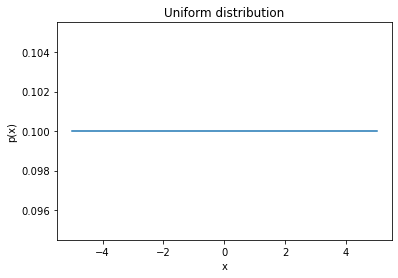

In [36]:
_ = plt.plot(x, uniform_distribution(x,-5,5))
_ = plt.xlabel('x')
_ = plt.ylabel('p(x)')
_ = plt.title('Uniform distribution')

In [48]:
num_steps = 10**4
a = -5
b = 5
mu = 0
sigma = 1

x_record = np.zeros(num_steps)
x_record[0] = np.random.uniform(a,b,1)
for i in range(1,num_steps,1):
    
    x_prime = np.random.uniform(a,b,1) # draw a smaple from the uniform distribution.
    
    r = (uniform_distribution(x_prime,a,b)/uniform_distribution(x_prime,a,b))*(normal_distribution(x_prime, mu, sigma)/normal_distribution(x_record[i-1],mu,sigma))
    
    u = np.random.uniform(0,1,1)
    
    if u <= min(1,r):
        x_record[i] = x_prime
    else:
        x_record[i] = x_record[i-1]
        


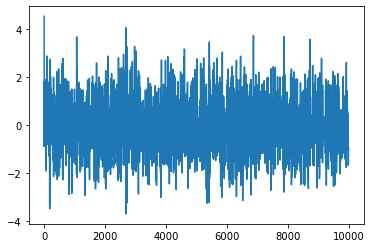

In [49]:
plt.plot(x_record)

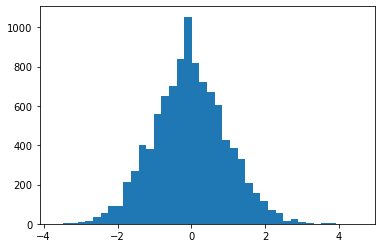

In [53]:
_ = plt.hist(x_record, bins = 40)